In [63]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
with open("times.csv", "r") as f:
    df = pd.read_csv(f)
df.describe()
#delete Unnamed: 0 column
df = df.drop(columns=["Unnamed: 0"])
df.describe()

,steps,init,get_variables,execution,maximum,total
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,49.005015,0.008573,0.302339,0.202998,501.000000,0.513910
std,6.738442,0.003764,0.102152,0.064923,287.953411,0.166670
min,14.000000,0.003552,0.082367,0.053479,3.000000,0.141801
25%,44.000000,0.006504,0.225970,0.155885,252.000000,0.387598
50%,49.000000,0.008137,0.300328,0.202140,501.000000,0.512726
75%,54.000000,0.010067,0.372225,0.247475,750.000000,0.630545
max,54.000000,0.077380,0.936732,0.680214,999.000000,1.639459


<Axes: xlabel='maximum', ylabel='execution'>

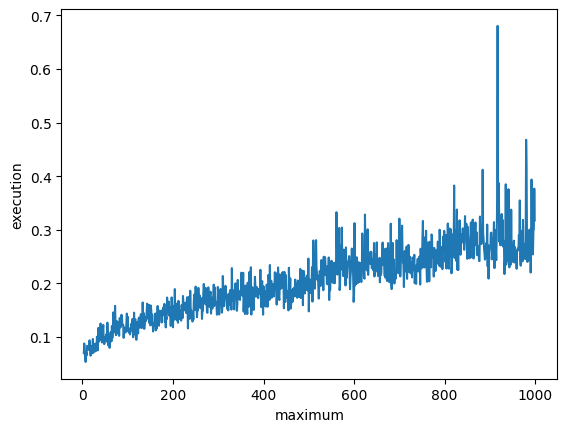

In [65]:
# plot the number of step as a function of the maximum
sns.lineplot(data=df, x="maximum", y="execution")

<Axes: xlabel='maximum', ylabel='total'>

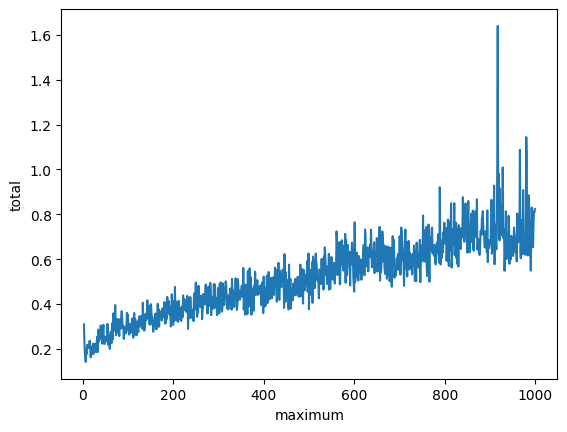

In [66]:
sns.lineplot(data=df, x="maximum", y="total")

<Axes: xlabel='maximum', ylabel='init'>

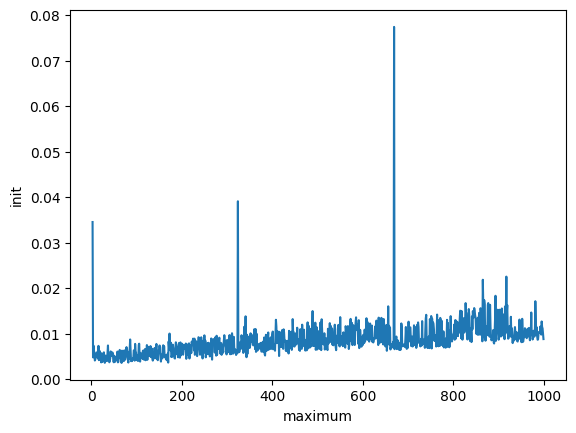

In [67]:
sns.lineplot(data=df, x="maximum", y="init")

<Axes: xlabel='maximum', ylabel='get_variables'>

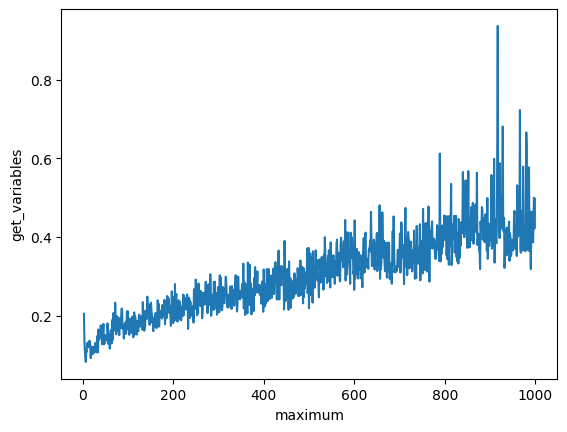

In [68]:
sns.lineplot(data=df, x="maximum", y="get_variables")

<Axes: xlabel='maximum', ylabel='execution+get_variables/step'>

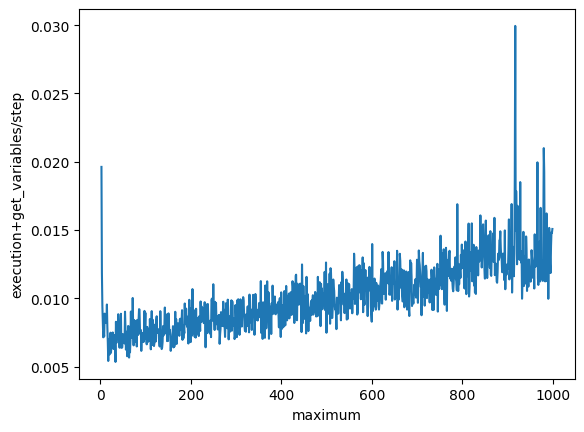

In [69]:
# I want to obtain execution+get_variables / step as a function of the maximum
df["execution+get_variables"] = df["execution"] + df["get_variables"]
df["execution+get_variables/step"] = df["execution+get_variables"] / df["steps"]
sns.lineplot(data=df, x="maximum", y="execution+get_variables/step")

## Java with code change

In [70]:
with open("java_perf.csv", "r") as f:
    dfj = pd.read_csv(f)
dfj.describe()

,Unnamed: 0,init,load_arguments,get_variables,execution_step,step,compile,load_code,execute
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,98.510101,0.153622,0.035878,9.258182,9.005482,99.510101,0.595190,0.015716,18.543894
std,57.319280,0.009248,0.011599,5.252357,5.119380,57.319280,0.100583,0.018111,10.365423
min,0.000000,0.138999,0.018013,0.251229,0.225415,1.000000,0.498221,0.008410,0.890795
25%,49.250000,0.147529,0.028661,4.719228,4.600434,50.250000,0.538261,0.010805,9.590693
50%,98.500000,0.150990,0.032485,9.364320,9.019725,99.500000,0.560475,0.012591,18.695667
75%,147.750000,0.158262,0.040210,13.790442,13.507731,148.750000,0.617640,0.016753,27.572784
max,198.000000,0.210500,0.096915,18.497645,17.784469,199.000000,1.269643,0.251235,36.582000


<Axes: xlabel='step', ylabel='execute'>

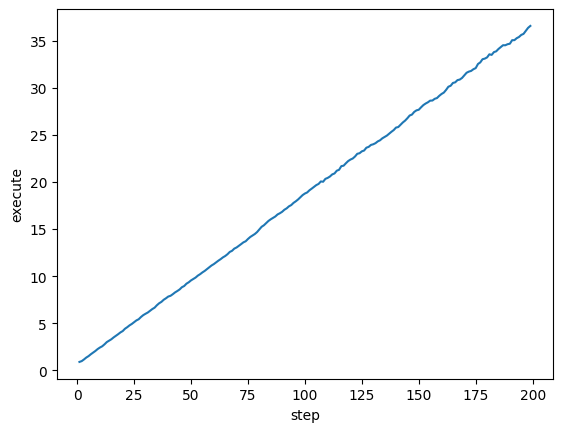

In [71]:
sns.lineplot(data=dfj, x="step", y="execute")

<Axes: xlabel='step', ylabel='load_code'>

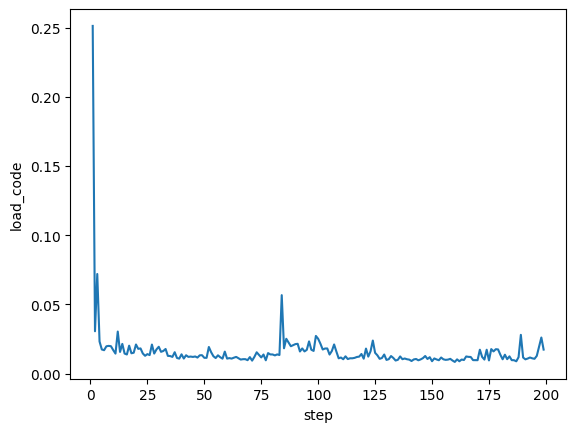

In [72]:
sns.lineplot(data=dfj, x="step", y="load_code")

<Axes: xlabel='step', ylabel='compile'>

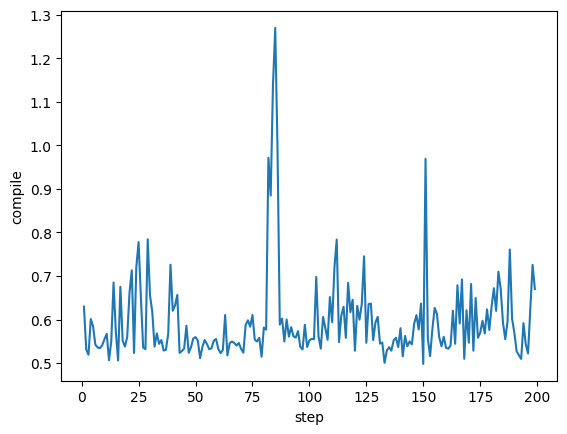

In [73]:
sns.lineplot(data=dfj, x="step", y="compile")

<Axes: xlabel='step', ylabel='load_arguments'>

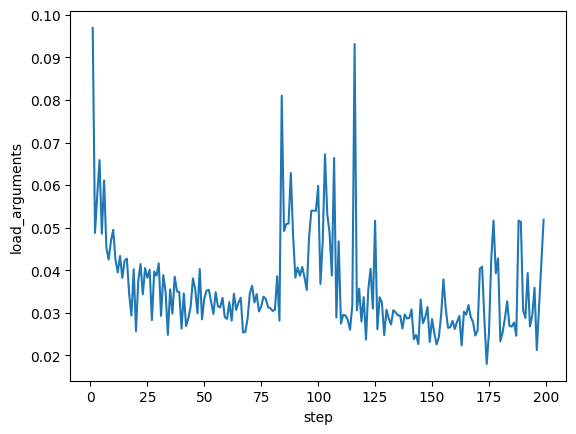

In [74]:
sns.lineplot(data=dfj, x="step", y="load_arguments")

<Axes: xlabel='step', ylabel='execution_step'>

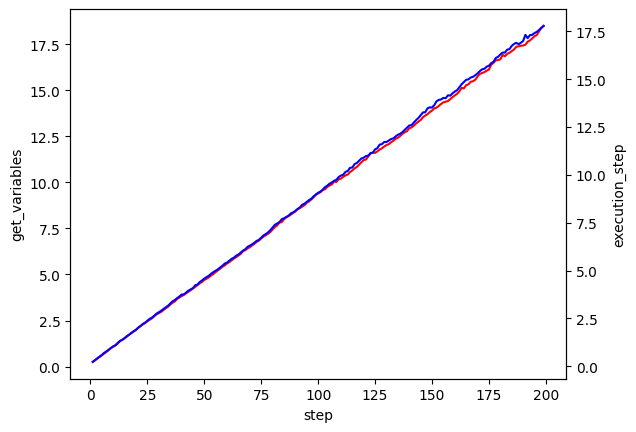

In [75]:
# plotl ine for get_variables and execution_step depending on the number of steps in the same graph
g = sns.lineplot(data=dfj, x="step", y="get_variables", color="red")
sns.lineplot(data=dfj, x="step", y="execution_step", ax=g.axes.twinx(), color="blue")

<Axes: xlabel='step', ylabel='execution_step/step'>

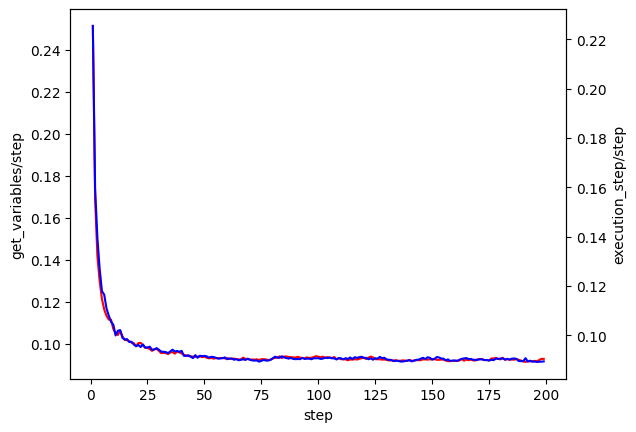

In [76]:
# same as above but with the ratio
dfj["get_variables/step"] = dfj["get_variables"] / dfj["step"]
dfj["execution_step/step"] = dfj["execution_step"] / dfj["step"]
g = sns.lineplot(data=dfj, x="step", y="get_variables/step", color="red")
sns.lineplot(data=dfj, x="step", y="execution_step/step", ax=g.axes.twinx(), color="blue")

<Axes: xlabel='step', ylabel='total/step'>

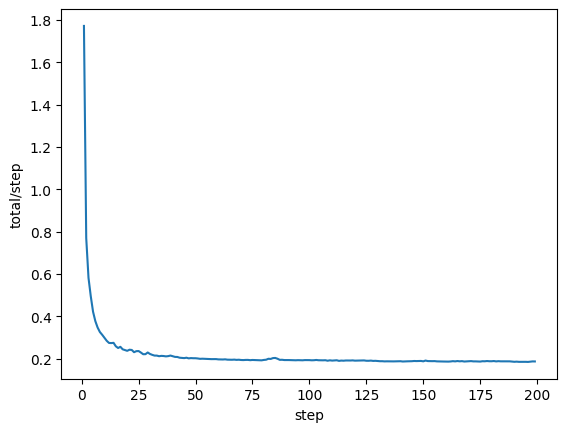

In [77]:
dfj['total'] = dfj['execute'] + dfj['load_code'] + dfj['compile']
dfj['total/step'] = dfj['total'] / dfj['step']
sns.lineplot(data=dfj, x="step", y="total/step")

<Axes: xlabel='step', ylabel='total'>

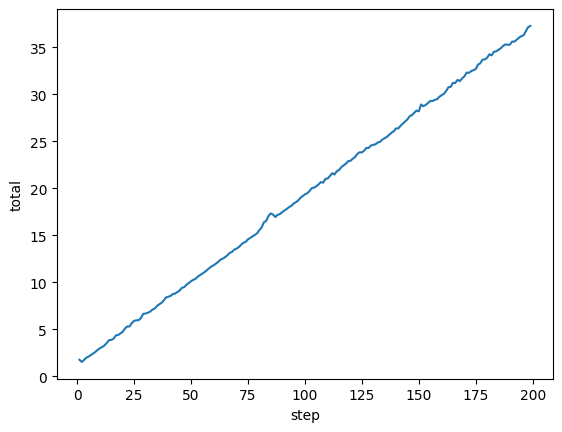

In [78]:
sns.lineplot(data=dfj, x="step", y="total")

#### JDI perf

In [79]:
with open("jdi_perf.csv", "r") as f:
    dfjdi = pd.read_csv(f)
# remove unnamed column
dfjdi = dfjdi.drop(columns=["Unnamed: 0"])
#convert columns time to float
dfjdi["time"] = dfjdi["time"].astype(float)
dfjdi.head()

,step,time
0,10,0.104909
1,11,0.038784
2,12,0.031826
3,13,0.030512
4,14,0.032412


<Axes: xlabel='step', ylabel='time'>

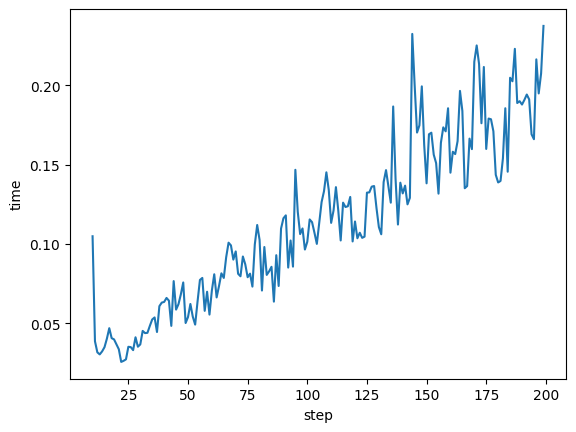

In [80]:
sns.lineplot(data=dfjdi, x="step", y="time")

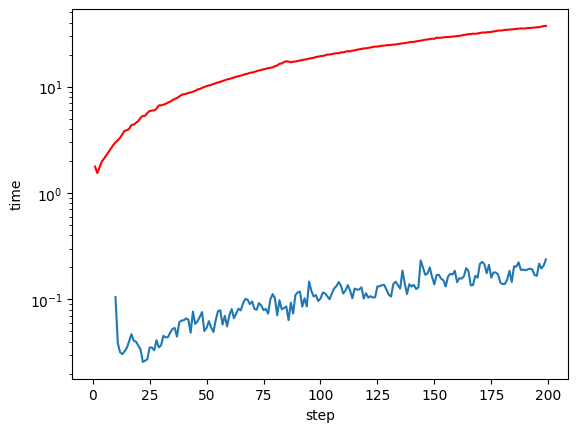

In [81]:
# compare jdi time to total from java, with log scale on y axis
sns.lineplot(data=dfjdi, x="step", y="time")
sns.lineplot(data=dfj, x="step", y="total", color="red")
plt.yscale("log")